In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv('data/framingham.csv')
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


This dataset includes information of multiple patients, some of whom have a heart disease, this dataset has some important columns that can be useful for the predictions, such as gender, age, current smoker, cigarettes per day blood pressure medication, and more

The question is the following: *Does a 40-year-old man, with a BMI of 22, who doesn't smoke, but has a prevalent stroke (the other values are average), have a heart disease?*

There are certain elements that don't seem to have a big impact on whether the patient has a heart disease such as the education of the patient

In [15]:
# Check info to check the amount of null elements
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [16]:
# Drop the unnecessary columns and null rows
dataset.drop(columns=['education'], inplace=True, axis=1)
dataset.dropna(inplace=True)

# Check new dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


Text(0, 0.5, 'Current Smoker')

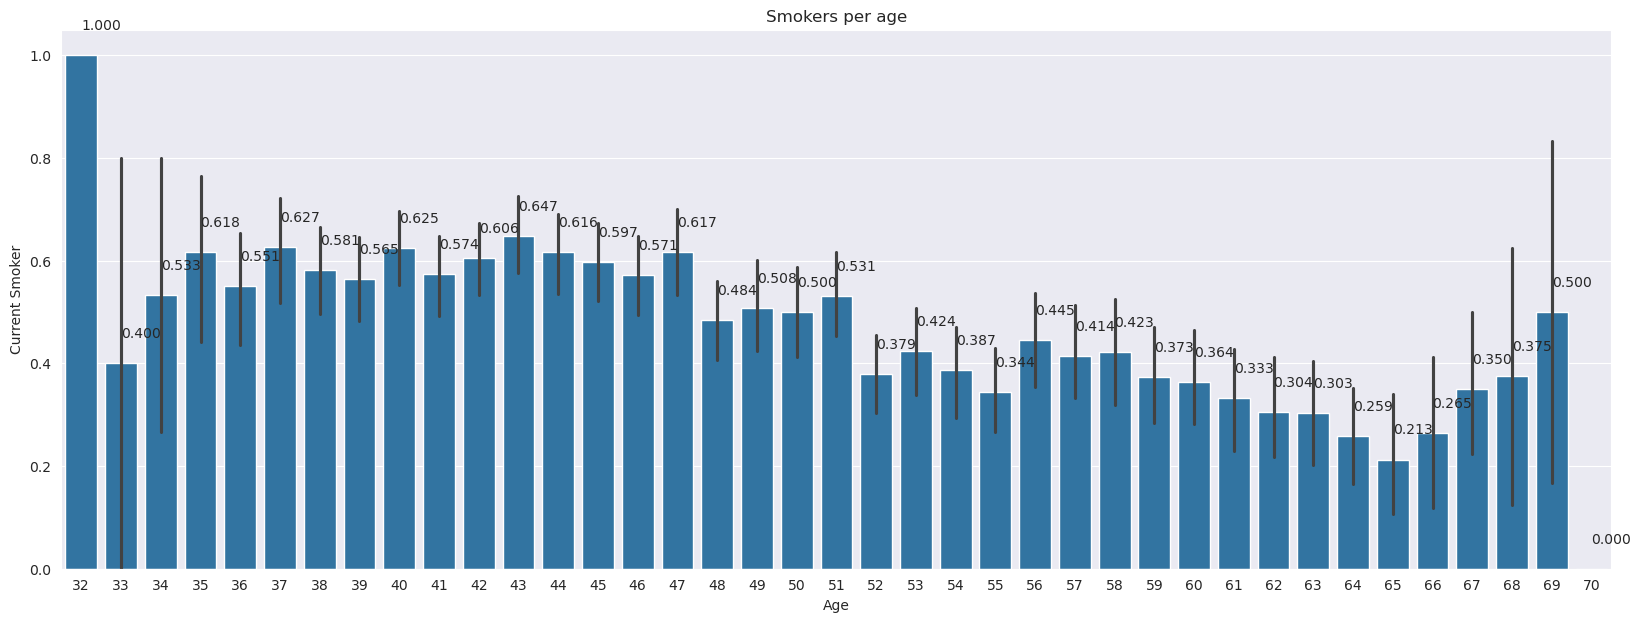

In [22]:
# Graph amount of smoker patients per age
fig, ax = plt.subplots(figsize=(20, 7))

bp = sns.barplot(data=dataset, x=dataset['age'], y=dataset['currentSmoker'], ax=ax,)
plt.title('Follower count of the first 20 users')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

plt.title('Smokers per age')
plt.xlabel('Age')
plt.ylabel('Current Smoker')

This is a great graph that shows the amount of patients that smoke per age, it is interesting to see how the trend goes down until 65, where it starts going up at the age of 66, on the other hand, most of the ages have less than half the patient smoking

Text(0.5, 0, 'Age')

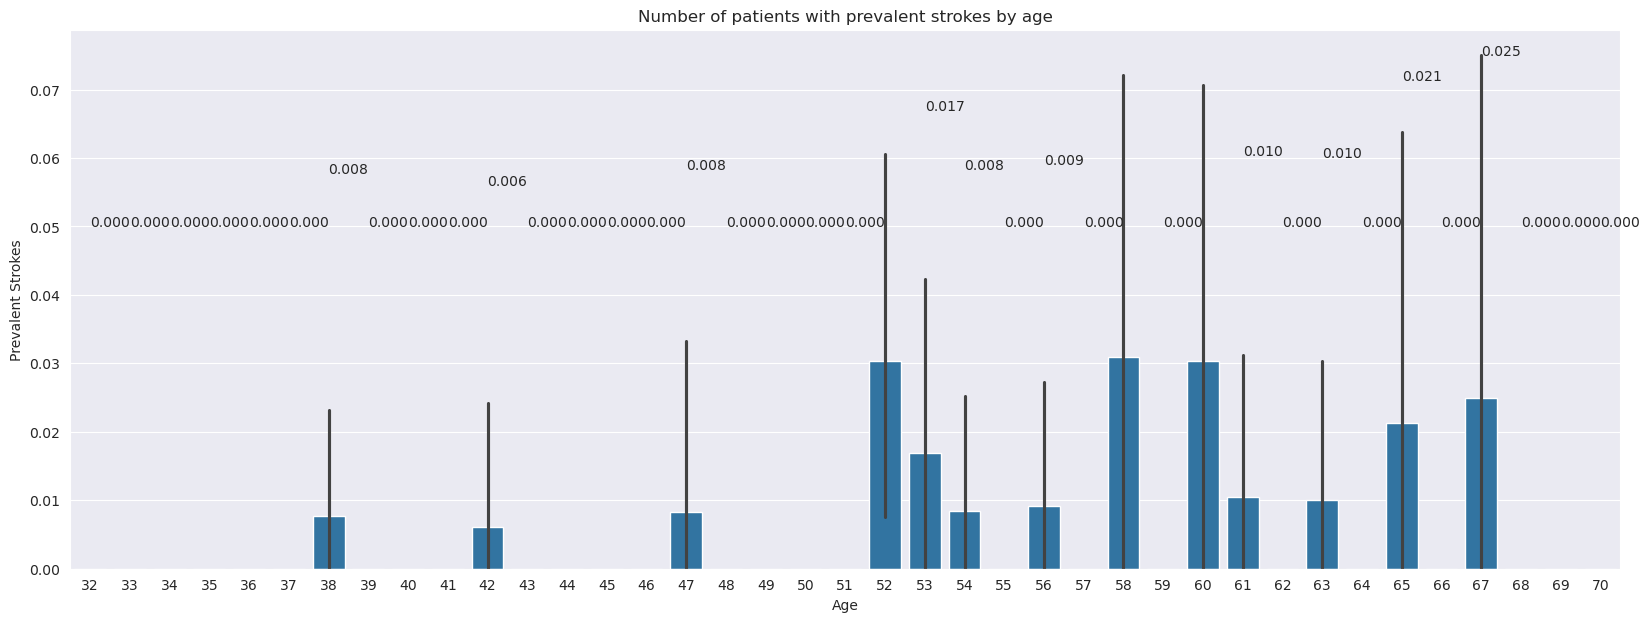

In [25]:
# Graph the number of patients with a prevalent stroke per age

fig, ax = plt.subplots(figsize=(20, 7))
bp = sns.barplot(data=dataset, x=dataset['age'], y=dataset['prevalentStroke'])

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

plt.title('Number of patients with prevalent strokes by age')
plt.ylabel('Prevalent Strokes')
plt.xlabel('Age')

This graph shows us that there is not a big amount of patients with a prevalent stroke, and we can also see that most of the patients with prevalent strokes are in the range of 50 - 67 years, but it also seems like strokes tend to appear in the 35 - 50 year range

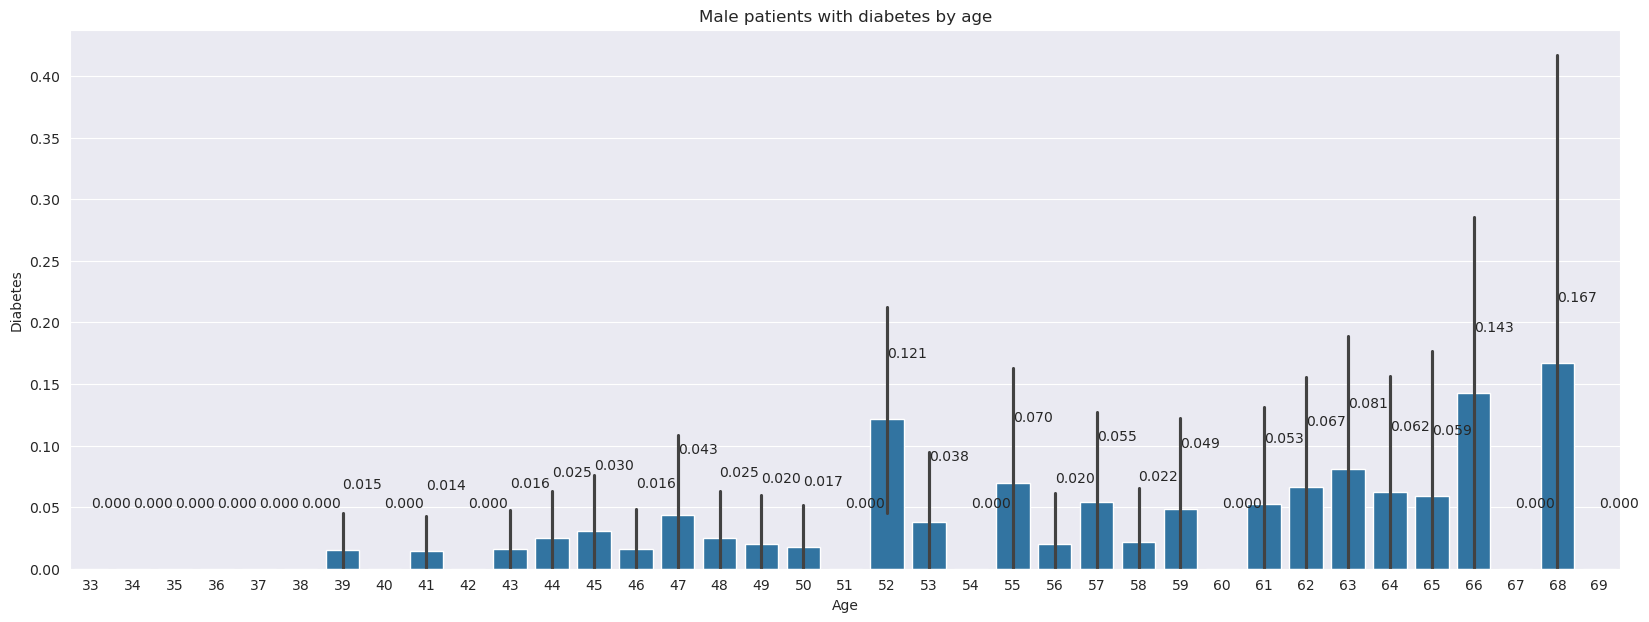

In [27]:
# Number of male patients with diabetes per age

# Query
male_diabetes = dataset[dataset['male'] == 1]

# Graph
fig, ax = plt.subplots(figsize=(20, 7))
bp = sns.barplot(data=male_diabetes, x=male_diabetes['age'], y=male_diabetes['diabetes'], ax=ax)
plt.title('Male patients with diabetes by age')
plt.ylabel('Diabetes')
plt.xlabel('Age')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

The graph shows us that male patients start to get diagnosed with diabetes around the age of 39 years, it becomes more common as the patients get older, with an interesting case at the age of 52, where there are more patients with diabetes, being this age the third one with the most diabetes patients

Text(0.5, 0, 'Age')

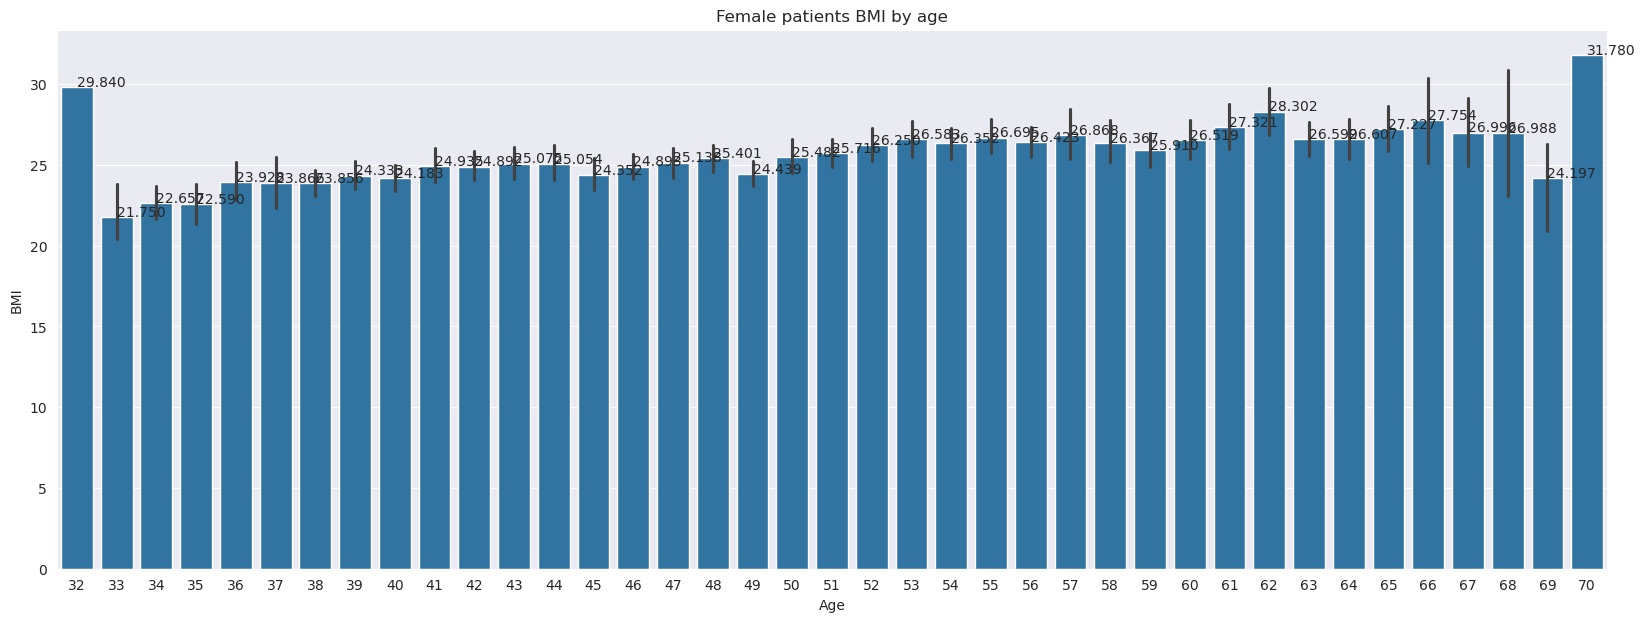

In [29]:
# BMI of female patients by age
# Query
female_bmi = dataset[dataset['male'] == 0]

# Graph
fig, ax = plt.subplots(figsize=(20, 7))
bp = sns.barplot(data=female_bmi, x=female_bmi['age'], y=female_bmi['BMI'], ax=ax)

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))
    
plt.title('Female patients BMI by age')
plt.ylabel('BMI')
plt.xlabel('Age')

The graph shows how there is a trend in the average BMI per age, where it slowly grows from around 21 to around 28, before the trend changes, it is also very interesting to see the great difference in the BMI for ages 32 and 70 compared to the other ages, being these two the highest BMIs on the dataset

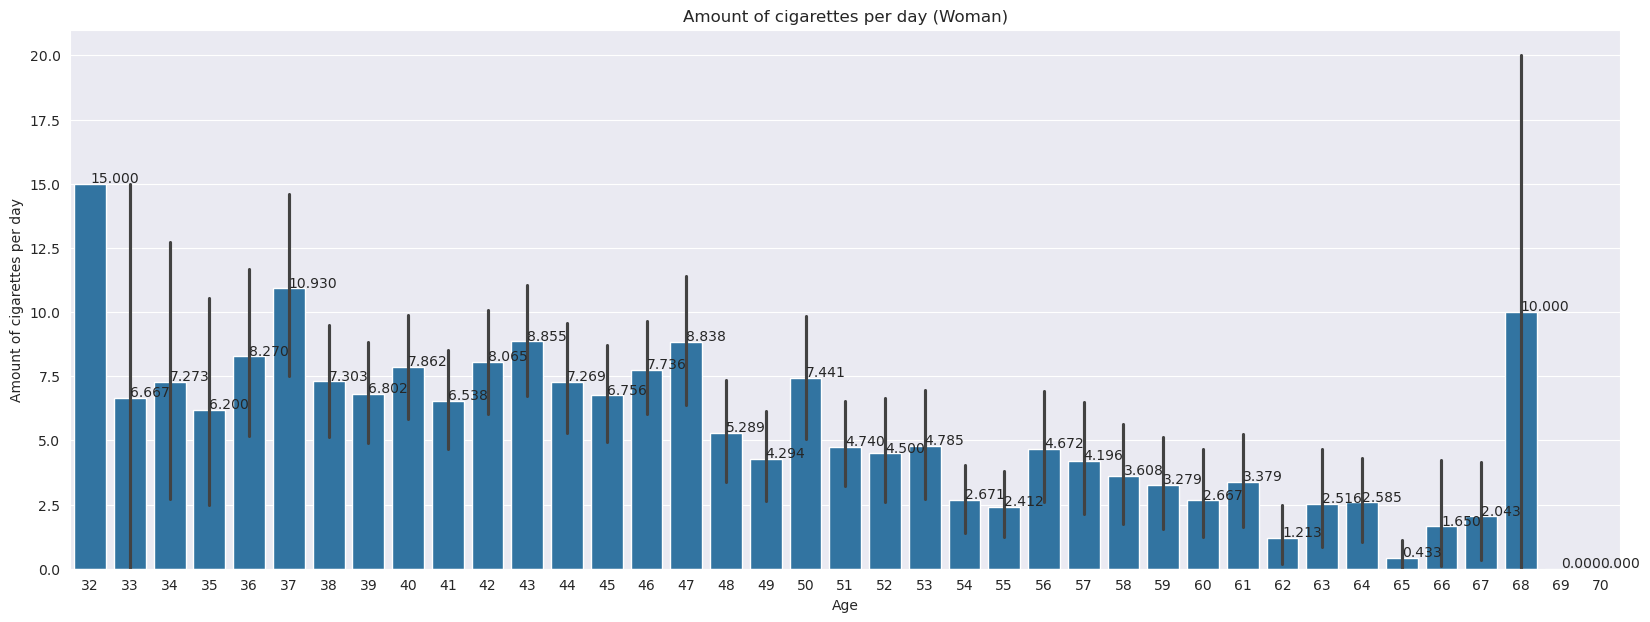

In [31]:
# Number of cigarettes per day for female patients
# Query
female_cigarettes_per_day = dataset[dataset['male'] == 0]

# Graph
fig, ax = plt.subplots(figsize=(20, 7))
bp = sns.barplot(data=female_cigarettes_per_day, x=female_cigarettes_per_day['age'], y=female_cigarettes_per_day['cigsPerDay'], ax=ax)
plt.title('Amount of cigarettes per day (Woman)')
plt.ylabel('Amount of cigarettes per day')
plt.xlabel('Age')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2., g.get_height() + .05))

Overall, in this graph we see a trend that goes down in regard to the amount of cigarettes smoked per day, although, there are some spikes on the graph, they are usually lower than the last spike, in this case, there is a similar trend as the last graph, where ages 32 and 68 are some of the highest smokers, in this case,age 32 has the most smoked cigarettes per day, and age 68 has 10 cigarettes per day 

In [32]:
# Get the dependent and independent variables
X, y = dataset.drop('TenYearCHD', axis=1), dataset['TenYearCHD']

# Split data, display X_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2799,0,61,0,0.0,0.0,0,1,0,224.0,155.0,71.0,25.98,75.0,86.0
2156,0,44,1,5.0,0.0,0,0,0,265.0,110.0,78.0,20.88,60.0,68.0
991,1,39,1,30.0,0.0,0,0,0,199.0,124.0,86.0,23.39,76.0,72.0
3026,0,66,0,0.0,0.0,0,1,0,273.0,197.0,91.0,23.22,95.0,80.0
766,1,55,1,20.0,0.0,0,1,0,220.0,180.0,108.0,23.59,82.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,1,58,1,13.0,0.0,0,0,0,196.0,120.0,74.0,20.12,75.0,73.0
1449,1,37,1,30.0,0.0,0,0,0,275.0,127.0,80.0,27.22,85.0,93.0
963,0,42,1,9.0,0.0,0,0,0,218.0,109.5,67.0,23.48,65.0,71.0
3973,0,62,0,0.0,0.0,0,1,0,309.0,146.0,82.5,28.55,64.0,71.0


In [37]:
# Create the model using Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Test accuracy
accuracy = model.score(X_test, y_test)
accuracy 

0.8444444444444444

In [42]:
# Create test based on the question in part 3
# Does a 40-year-old man, with a BMI of 22, who doesn't smoke, but has a prevalent stroke (the other values are average), have a heart disease?
test = {
    'male': [0],
    'age': [40],
    'currentSmoker': [0],
    'cigsPerDay': [0.0],
    'BPMeds': [0.0],
    'prevalentStroke': [1],
    'prevalentHyp': [0],
    'diabetes': [0],
    'totChol': [190.0],
    'sysBP': [100.0],
    'diaBP': [70.0],
    'BMI': [22],
    'heartRate': [70],
    'glucose': [95]
}

test_df = pd.DataFrame(test)
result = model.predict(test_df)
print(f'Result (0 - No heart disease, 1 - Heart disease): {result}')

Result (0 - No heart disease, 1 - Heart disease: [0]
